https://machinelearningmastery.com/regression-metrics-for-machine-learning/



    Regression Predictive Modeling
    Evaluating Regression Models
    Metrics for Regression
        Mean Squared Error
        Root Mean Squared Error
        Mean Absolute Error


In [1]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('solarData2.csv')
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
print(type(y))

<class 'pandas.core.series.Series'>


In [3]:
# # import library
# from collections import Counter

# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import RandomOverSampler

# ros = RandomOverSampler(random_state=42)

# # fit predictor and target variable

# x_ros, y_ros = ros.fit_resample(X, y)

# print('Original dataset shape', Counter(y))
# print('Resample dataset shape', Counter(y_ros))
# len(y)
# # print(y.shape())
# # print(X.shape())
# # print(y_ros.shape())
# # print(x_ros.shape())
# X=x_ros
# y=y_ros
# #print(type(y))
# #y1=y.values.reshape(-1,1)

In [4]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X=scaler.fit_transform(X)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
print("shape of X_train: ",X_train.shape)
print("shape of X_test: ",X_test.shape)
print("shape of y_train: ",y_train.shape)
print("shape of y_test: ",y_test.shape)

shape of X_train:  (892, 7)
shape of X_test:  (224, 7)
shape of y_train:  (892,)
shape of y_test:  (224,)


In [6]:
LR = LinearRegression()
LR.fit(X_train, y_train)
# Predicting the Test set results
y_pred = LR.predict(X_test)

In [7]:
y_pred = LR.predict(X_test)
#print('Coefficients: \n', LR.coef_)
# The mean squared error
#print("Mean squared error: %.2f" % np.mean((LR.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
#print('Variance score: %.2f' % regressor.score(X_test, y_test))
print("Linear Regression:")
print("Mean Absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Root Mean squared error: %.2f" % mean_squared_error(y_pred,y_test, squared=False))
#print("R2 value:%2f" % r2_score(y_test, y_pred))
print("R2 value:%2f" % r2_score(y_test, y_pred))

Linear Regression:
Mean Absolute error: 164.54
Mean squared error: 61042.33
Root Mean squared error: 247.07
R2 value:0.966078


In [8]:
# d = y_test - y_pred
# mse_f = np.mean(d**2)
# mae_f = np.mean(abs(d))
# rmse_f = np.sqrt(mse_f)
# r2_f = 1-(sum(d**2)/sum((y-np.mean(y))**2))

# print("Results by manual calculation:")
# print("MAE:",mae_f)
# print("MSE:", mse_f)
# print("RMSE:", rmse_f)
# print("R-Squared:", r2_f)

In [9]:
#y_test

In [10]:
#y_pred

In [11]:
Logistic_R = LogisticRegression()
Logistic_R.fit(X_train, y_train)
# Predicting the Test set results
#y_pred = Logistic_R.predict(X_test)

y_pred = Logistic_R.predict(X_test)
#print('Coefficients: \n', LR.coef_)
# The mean squared error
#print("Mean squared error: %.2f" % np.mean((LR.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
#print('Variance score: %.2f' % regressor.score(X_test, y_test))
print("Logistic Regression:")
print("Mean Absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Root Mean squared error: %.2f" % mean_squared_error(y_pred,y_test, squared=False))
#print("R2 value:%2f" % r2_score(y_test, y_pred))
print("R2 value:%2f" % r2_score(y_test, y_pred))

Logistic Regression:
Mean Absolute error: 536.57
Mean squared error: 779026.29
Root Mean squared error: 882.62
R2 value:0.567088


C:\Users\laksh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler


#Performing feature scaling, since it is not an inbuild feature of SVR class in sk-learn

scale_X = StandardScaler()
scale_y = StandardScaler()

#y=y.reshape(-1, 1)

X_sc = scale_X.fit_transform(X)
y_sc = scale_y.fit_transform(y.values.reshape(-1,1))


X_sc_train, X_sc_test, y_sc_train, y_sc_test = train_test_split(X_sc, y_sc, test_size=0.2, random_state=42)

svr_regressor = SVR(kernel='rbf', gamma='auto')
svr_regressor.fit(X_sc_train, y_sc_train)

y_sc_pred = svr_regressor.predict(X_sc_test)


print("Support Vector Regression:")
print("Mean Absolute error: %.2f" % mean_absolute_error(y_sc_test, y_sc_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_sc_test, y_sc_pred))
print("Root Mean squared error: %.2f" % mean_squared_error(y_sc_pred,y_sc_test, squared=False))
#print("R2 value:%2f" % r2_score(y_test, y_pred))
print("R2 value:%2f" % r2_score(y_sc_test, y_sc_pred))

Support Vector Regression:
Mean Absolute error: 0.09
Mean squared error: 0.01
Root Mean squared error: 0.10
R2 value:0.991282


C:\Users\laksh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [13]:
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor(random_state = 0)
tree_regressor.fit(X_train, y_train)



y_dt_pred = tree_regressor.predict(X_test)


print("Support Vector Regression:")
print("Mean Absolute error: %.2f" % mean_absolute_error(y_test, y_dt_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_dt_pred))
print("Root Mean squared error: %.2f" % mean_squared_error(y_dt_pred,y_test, squared=False))
#print("R2 value:%2f" % r2_score(y_test, y_pred))
print("R2 value:%2f" % r2_score(y_test, y_dt_pred))

Support Vector Regression:
Mean Absolute error: 0.00
Mean squared error: 0.00
Root Mean squared error: 0.00
R2 value:1.000000


In [14]:
from sklearn.ensemble import RandomForestRegressor
forest_regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
forest_regressor.fit(X_train, y_train)

y_rf_pred = tree_regressor.predict(X_test)


print("RF Regression:")
print("Mean Absolute error: %.2f" % mean_absolute_error(y_test, y_rf_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_rf_pred))
print("Root Mean squared error: %.2f" % mean_squared_error(y_rf_pred,y_test, squared=False))
#print("R2 value:%2f" % r2_score(y_test, y_pred))
print("R2 value:%2f" % r2_score(y_test, y_rf_pred))

Support Vector Regression:
Mean Absolute error: 0.00
Mean squared error: 0.00
Root Mean squared error: 0.00
R2 value:1.000000


In [15]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors = 2)
knn.fit(X_train, y_train)  #fit the model
y_knn_pred=knn.predict(X_test) #make prediction on test set

print("K-Nearest Neighbor Regression:")
print("Mean Absolute error: %.2f" % mean_absolute_error(y_test, y_knn_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_knn_pred))
print("Root Mean squared error: %.2f" % mean_squared_error(y_knn_pred,y_test, squared=False))
#print("R2 value:%2f" % r2_score(y_test, y_pred))
print("R2 value:%2f" % r2_score(y_test, y_knn_pred))

K-Nearest Neighbor Regression:
Mean Absolute error: 0.00
Mean squared error: 0.00
Root Mean squared error: 0.00
R2 value:1.000000


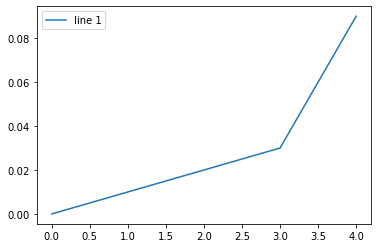

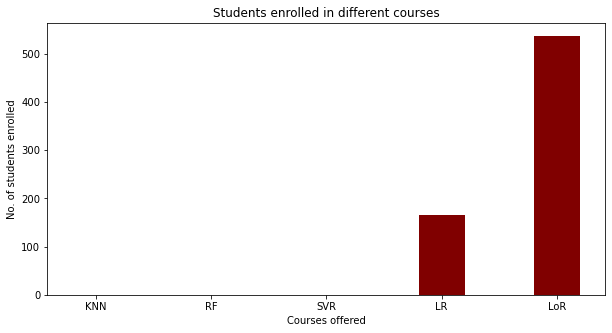

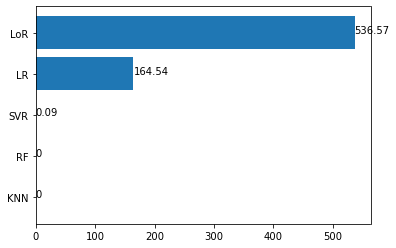

In [31]:
LR_MAE=[164.54]
LoR_MAE=[536.57]
SVR_MAE=[0,0.01,0.02,0.03,0.09]
RF_MAE=[0]
KNN_MAE=[0]
MAE=[0,0,0.09,164.54,536.57]

# importing package
import matplotlib.pyplot as plt
import numpy as np

# create data
x = [1,2,3,4,5]
y = [3,3,3,3,3]

# plot lines
plt.plot(SVR_MAE, label = "line 1", linestyle="-")
#plt.plot(y, x, label = "line 2", linestyle="--")
#plt.plot(x, np.sin(x), label = "curve 1", linestyle="-.")
#plt.plot(x, np.cos(x), label = "curve 2", linestyle=":")
plt.legend()
plt.show()



import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'KNN':0, 'RF':0, 'SVR':0.09,'LR':164.54,'LoR':536.57}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon', width = 0.4)
 
plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()

import matplotlib.pyplot as plt
x = ["KNN", "RF", "SVR", "LR", "LoR"]
MAE=[0,0,0.09,164.54,536.57]

#fig = plt.figure(figsize = (10, 5)

plt.barh(x,MAE)

for index, value in enumerate(MAE):
        plt.text(value, index,str(value))
  
plt.show()